In [1]:
import sympy as sp
import sympy.vector as sv
import sympy.physics.vector as spv

spv.init_vprinting()

from sympy import symbols, Symbol, Matrix, zeros, Eq, solve, simplify, expand, cos, sin

v_zero = sv.Vector.zero
N = sv.CoordSys3D("N", vector_names=("e_1", "e_2", "e_3"))


# TODO move to sv_util and refactor sv_utils
def create_vector(frame: sv.CoordSys3D, *args):
    basis = N.base_vectors()
    return basis[0] * args[0] + basis[1] * args[1] + basis[2] * args[2]

# Problem Sheet 1

## Question 1.1

Consider the vectors a = (1, 2, 4). and b = (1, 1, 3). in an orthonormal, 
right-handed basis.

i. construct unit vectors ˆa parallel to a and ˆb parallel to b ;

ii. use the scalar product to determine the component of a in the 
direction of b ;

iii. hence express a as a sum of vectors parallel and perpendicular to b ;

iv. construct a vector c orthogonal to both a and b by requiring that 
c·a = c·b = 0;

v. Verify that ˆc is proportional to ±aˆ ×ˆb . What is the coefficient of proportionality, and what determines the sign?

In [2]:
a = N.e_1 + 2 * N.e_2 + 4 * N.e_3
b = N.e_1 + N.e_2 + 3 * N.e_3

# i.
a_hat = a.normalize()
b_hat = b.normalize()
display("i.", a_hat, b_hat)

# ii.
a_proj_b = a.dot(b.normalize()) * b_hat
display("ii.", a_proj_b)

# iii.
a_perp_b = a - a_proj_b
display("iii.", a_perp_b)
assert a_perp_b.dot(a_proj_b) == 0
assert (a_proj_b + a_perp_b) == a

# iv.
c_i = symbols("c_1:4")
c = c_i[0] * N.e_1 + c_i[1] * N.e_2 + c_i[2] * N.e_3

eqn1, eqn2 = Eq(c.dot(a), 0), Eq(c.dot(b), 0)
result1 = solve([eqn1, eqn2])
result_c = c.subs(result1)
display("iv", result_c)

# v.
display("v", a.cross(b))

'i.'

'ii.'

'iii.'

'iv'

'v'

In [3]:
a.cross(b)

## Question 1.2

Find the general vector that is orthogonal to $a$ and coplanar with 
$a$ and $b$where $a =(8, 2, −1)$ and $b = (3, −1, −3)$ in an orthonormal basis.



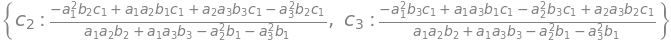

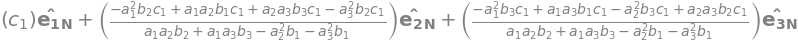

In [4]:
ai = symbols("a1:4", real=True)
bi = symbols("b1:4", real=True)
ci = symbols("c1:4", real=True)

values = {
    ai[0]: 8,
    ai[1]: 2,
    ai[2]: -1,
    bi[0]: 3,
    bi[1]: -1,
    bi[2]: -3,
}

a = create_vector(N, *ai)
b = create_vector(N, *bi)
c = create_vector(N, *ci)

eqn1 = Eq(a.dot(c), 0)  # Orthogonal
eqn2 = Eq(c.dot(a.cross(b)), 0)  # Coplanar

result1 = solve([eqn1, eqn2], ci[1:3])
display(result1)  # general solution
display(c.subs(result1))  # specific solution

vec_a = a.subs(values)
vec_b = b.subs(values)
vec_c = c.subs(result1).subs(values)

# All vectors satisfying condition with c_1 free variable
display(vec_c)

assert vec_c.dot(vec_a) == 0, "c and a not orthogonal"
assert vec_c.dot(vec_a.cross(vec_b)) == 0, "c, a and b not coplanar"

## Question 1.3

A (plane) triangle is formed by the three vectors $A$, $B$ and $C$, 
such that $A + B + C = 0$ ,and the angles at the vertices are $\alpha$ 
(between B and C), $\beta$ (between C and A) and $\gamma$ 
.
Show that $A \times B = B \times C = C \times A$, and hence establish 

the ‘sine rule’ that:–
$$
\frac{\sin \alpha} {|A|} = \frac{\sin \beta} {|B|} = \frac{\sin \gamma} {|C|}
$$

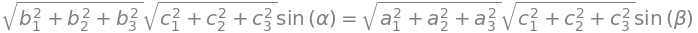

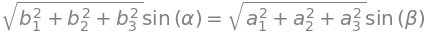

In [5]:
ai = symbols("a1:4", real=True)
bi = symbols("b1:4", real=True)
ci = symbols("c1:4", real=True)
alpha, beta, gamma = symbols("alpha, beta, gamma", real=True)

A, B, C = Matrix(ai), Matrix(bi), Matrix(ci)
eqn1 = Eq(A + B + C, zeros(3, 1))  # Triangle equality
result1 = solve(eqn1, ai)  # Solve for components of a in terms of b, c

# Ensures A x B = B x C by A x B - B x C = 0
assert (
    ((A.cross(B) - B.cross(C)).subs(result1))  # result in terms of b, c
    .applyfunc(lambda x: simplify(x))
) == zeros(3, 1)

# Ensures B x C = C x A by B x C - C x A= 0
assert (
    ((B.cross(C) - C.cross(A)).subs(result1))  # result in terms of b, c
    .applyfunc(lambda x: simplify(x))
) == zeros(3, 1)


result1 = Eq(B.norm() * C.norm() * sin(alpha), C.norm() * A.norm() * sin(beta))

display(result1)

Eq(result1.lhs / C.norm(), result1.rhs / C.norm())

## Question 1.4

Which of the following vector identities are true?

(i) $ \underline c · (\underline a × \underline b) = (\underline b × \underline a) · \underline c$;

(ii) $\underline a × (\underline b × \underline c) = (\underline a × \underline b) × \underline c$;

(iii) $(\underline a × \underline b) × \underline c = (\underline a · \underline c)\underline b − (\underline a · \underline b)\underline c$;

(iv) $(\underline a × \underline b) × (\underline c × \underline b) = \underline b[\underline b · (\underline c × \underline a)]$.


In [6]:
ai = symbols("a1:4", real=True)
bi = symbols("b1:4", real=True)
ci = symbols("c1:4", real=True)

a = Matrix(ai)
b = Matrix(bi)
c = Matrix(ci)

# i.
assert c.dot(a.cross(b)).expand() != (b.cross(a).dot(c)).expand()

# ii.
assert a.cross(b.cross(c)).expand() != (a.cross(b).cross(c)).expand()

# iii.
assert (a.cross(b)).cross(c).expand() != (a.dot(c) * b - (a.dot(b)) * c).expand()

# iv.
assert (a.cross(b)).cross(c.cross(b)).expand() != (b * (b.dot(c.cross(a)))).expand()

## Question 1.5 

Deduce the following vector identities:

(i)

$ \underline A × (\underline B × \underline C) + \underline B ×
(\underline C × \underline A) + \underline C × (\underline A × \underline B) = 0
$ ;

(ii) 

$(\underline A × \underline B) · (\underline C × D) = (\underline A · \underline C)(\underline B · D) − 
(\underline A · D)(\underline B · \underline C)$ ;

(iii) 

$(\underline A × \underline B) × (\underline C × \underline A) = −(\underline A,\underline B,\underline C)\underline A$ .

In [7]:
ai = symbols("a1:4", real=True)
bi = symbols("b1:4", real=True)
ci = symbols("c1:4", real=True)
di = symbols("d1:4", real=True)

a = Matrix(ai)
b = Matrix(bi)
c = Matrix(ci)
d = Matrix(di)

# (i)
assert (
    a.cross(b.cross(c)) + b.cross(c.cross(a)) + c.cross(a.cross(b))
).expand() == zeros(3, 1)

# (ii)
assert ((a.cross(b)).dot(c.cross(d)).expand()) == (
    (a.dot(c)) * (b.dot(d)) - (a.dot(d)) * (b.dot(c))
).expand()

# (iii)
assert ((a.cross(b)).cross(c.cross(a)).expand()) == (-(a.dot(b.cross(c))) * a).expand()

## Problem Sheet 2

### Question 2.1 

Show that the perpendicular distance of the point with position vector 
$\mathbf d$ from the plane 
$\mathbf r · \mathbf a = b$ is $|b − \mathbf d · \mathbf a|/\mathbf a$.

Transforming the equation $\ r · \mathbf a = b$ into the standard form 
by dividing by $|a|$ to normalise $\mathbf a$ we obtain 
$$ \ r · \frac{\mathbf a}{|a|} = \frac{b}{|a|} $$

The perpendicular distance from the origin to the plane is 
$\displaystyle \frac{b}{|a|}$. The distance along $\displaystyle \frac{\mathbf a}{|a|}$ is $\displaystyle \mathbf d\ \cdot \frac{\mathbf a}{|a|}$. So the 
perpendicular distance from $\mathbf d $ o the plane is

$$ \displaystyle 
    \frac{b}{|a|} - \mathbf d \cdot \frac{\mathbf a}{|a|} 
        = |b - \mathbf d \cdot \mathbf a| |\mathbf a|
$$

### Question 2.2 

Solve the following equations for $\mathbf r$ , and give a geometrical 
interpretation to your result:

\begin{align*}
    \mathbf a · \mathbf r =\ell \\ 
    \mathbf b × \mathbf r = \mathbf c
\end{align*} 

where $\mathbf a · \mathbf b \ne 0$ .

\begin{align*} 
    (\mathbf b \times \mathbf r) &= 
        \mathbf c \rightarrow \mathbf a \times (\mathbf b \times \mathbf r) 
            = \mathbf a \times \mathbf c \\
                                &\rightarrow 
        (\mathbf b \cdot \mathbf a) \mathbf r - (\mathbf r \cdot \mathbf a) 
            = \mathbf a \times \mathbf c \\ 
                                &\rightarrow 
        (\mathbf b \cdot \mathbf a) \mathbf r - \ell \mathbf b  
            = \mathbf a \times \mathbf c \\  
                                &\rightarrow 
        \mathbf r = \frac{\ell \mathbf b + \mathbf a \times \mathbf c}
            { \mathbf b \cdot  \mathbf a}
 \end{align*}

 ##TODO I cannot find a geometric interpretation of this equality

### Question 2.3 

Show that the solution of the vector equation
$$k \mathbf r + (\mathbf r × \mathbf a) = \mathbf b$$ 

where $k \ne 0$, is

$$\mathbf r(k^2 + a^2) = (\mathbf a × \mathbf b) + k \mathbf b + \frac{(\mathbf a · \mathbf b)\mathbf a}{k}$$

[ Hint: Take vector and scalar products of the original equation with a ]

In [8]:
# Define symbols
k = symbols("k", real=True)
ai = symbols("a1:4", real=True)
bi = symbols("b1:4", real=True)
ri = symbols("r1:4", real=True)

# Create vectors
a = Matrix(ai)
b = Matrix(bi)
r = Matrix(ri)

# Solve the equation k * r + r.cross(a) = b for r
eqn1 = Eq(k * r + r.cross(a), b)
solution1 = solve(eqn1, r)

# Define expressions
expr1 = r * (k**2 + a.norm() ** 2)
expr2 = a.cross(b) + k * b + (a.dot(b)) * a / k

# Verify equality
assert Eq(simplify(expr1.subs(solution1)), expand(expr2))

### Question 2.4

(i) A system of particles is subject to rotation described by an 
angular velocity vector $\mathbf \omega$. Draw a diagram to show that the velocity vector of a particle at position $\mathbf r$ is 
$\mathbf v = \mathbf \omega \times \mathbf r$, and show that this 
rotational velocity is perpendicular to the radius vector.

(ii) Any given velocity vector can be decomposed into rotational and 
radial components: write down expressions for these two components.

(iii) A particle rotates with period $T$ in a circle of radius $R$ in the 
$x−y$ plane, with the centre of the circle at $(x,y) = (X, 0)$. 
Write down an explicit expression for $\mathbf r(t)$; hence obtain the 
velocity $\mathbf v(t)$. What is the rotational component of
the velocity vector?

In [9]:
# Define dynamic symbols
theta = spv.dynamicsymbols("theta", level=0)
r, alpha, beta, gamma = sp.symbols("r, alpha, beta, gamma", real=True)
p = sp.symbols("p_x:z", real=True)

# Define reference frames
N = spv.ReferenceFrame("N")
A = spv.ReferenceFrame("A")

# Orient reference frame A relative to N
A.orient_axis(N, N.z, theta)

# Define position vector
position_p = p[0] * A.x + p[1] * A.y + p[2] * A.z

# Calculate velocity of point p
velocity_p = position_p.diff(sp.symbols("t"), N).simplify()

# Calculate velocity expression
velocity_expression = A.ang_vel_in(N).cross(position_p).express(N)

# ensure v = omega x r
assert velocity_p == velocity_expression

# ensure rotational velocity is perpendicular to the radius vector
assert position_p.dot(velocity_p).simplify() == 0